In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src import train, generate, eval
from modules.config import read_config
import modules.plots as plots
from modules.datageneration import load_data, data_functions
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
data_functions["test"] = lambda x: torch.tensor(x)

In [4]:
data_functions

{'sinusoidal': <function modules.datageneration.sinusoidal_func(xs, noise=0) -> <built-in function array>>,
 'sum': <function modules.datageneration.sum(xs, noise=0) -> <built-in function array>>,
 'multidim_sinusoidal_combination': <function modules.datageneration.multidim_sinusoidal_combination(xs, noise=0) -> <built-in function array>>,
 'tendim_sinusoidal_combination': <function modules.datageneration.tendim_sinusoidal_combination(xs, noise=0) -> <built-in function array>>,
 'onedim_non_linear': <function modules.datageneration.onedim_non_linear(xs, noise=0) -> <built-in function array>>,
 'onedim_linear': <function modules.datageneration.onedim_linear(xs, noise=0) -> <built-in function array>>,
 'test': <function __main__.<lambda>(x)>}

In [5]:
BASE_DIR = "../tests/gen-func-test"
PROFILE = "test"

In [6]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]
DATASET_NAME = dataset_config["NAME"]

====== Generating profile test-data ======
Train: (-3, 3)
Y-space: -1.6047139114265838 - 1.6050928676855165
In Domain: (-3, 3)
Y-space: -1.547414002382701 - 1.4876062581290124
Out Domain: (-6, 6)
Y-space: -1.5121809432653097 - 1.4740510545451089


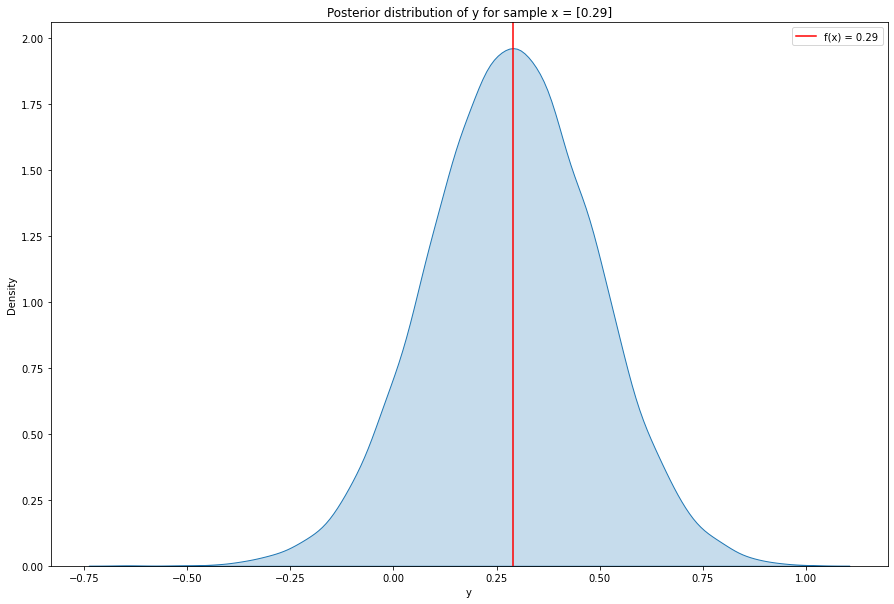

In [7]:
if True:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [8]:
(x_train, y_train), (x_val, y_val), (x_test_in_domain, y_test_in_domain), (x_test_out_domain, y_test_out_domain) = load_data(f"{BASE_DIR}/datasets/{DATASET_NAME}")

In [9]:
i = 0
x_test_out_domain[i], y_test_out_domain[i]

(tensor([-5.2636]), tensor([0.5848]))

In [10]:
#Min y and max y of the train data
y_min = y_train.min()
y_max = y_train.max()
print(f"Train Data: | y_min: {y_min}, y_max: {y_max}")

#Min y and max y of the train data
y_min = y_test_in_domain.min()
y_max = y_test_in_domain.max()
print(f"Test Data in domain: | y_min: {y_min}, y_max: {y_max}")

#Min y and max y of the train data
y_min = y_test_out_domain.min()
y_max = y_test_out_domain.max()
print(f"Test data out domain: | y_min: {y_min}, y_max: {y_max}")

Train Data: | y_min: -1.6047139167785645, y_max: 1.6050928831100464
Test Data in domain: | y_min: -1.547413945198059, y_max: 1.4876062870025635
Test data out domain: | y_min: -1.5121809244155884, y_max: 1.4740509986877441
